In [8]:
from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_nest.config import *
config = Config()
config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'


In [9]:
# import nest
# nest.Models()
# from pynestml.frontend.pynestml_frontend import install_nest  # to_nest, 
# import os
# nest_path = os.environ["NEST_INSTALL_DIR"]
# modules_path = os.environ["MYMODULES_BLD_DIR"]
# modules_and_models = {"iaf_cond_deco2014": ["iaf_cond_deco2014"], 
# #                       "iaf_cond_nmda_deco2014": ["iaf_cond_nmda_deco2014"], 
# #                       "iaf_cond_ampa_gaba_deco2014": ["iaf_cond_ampa_gaba_deco2014"], 
# #                       "scale_connection": ["scale_connection"], 
#                       "tvb_rate_wongwang": ["tvb_rate_ampa_gaba_wongwang", "tvb_rate_nmda_wongwang", 
#                                             "tvb_rate_redwongwang_exc", "tvb_rate_redwongwang_inh"]
#                       }
# for module, models in modules_and_models.items():
#     models_path = os.path.join(modules_path, '%s' % module)
#     # Compile models
#     install_nest(models_path, nest_path)
#     module_name = module + "module"
#     # Intall into NEST
#     nest.Install(module_name)
#     for model in models:  
#         print("\n" + model + "\n")
#         try:
#             print(nest.GetDefaults(model))
#             n = nest.Create(model, 1)
#             status=nest.GetStatus(n)
#             print("\n" + model + "\n")
#             print(status)
#         except:
#             n1 = nest.Create("iaf_cond_ampa_gaba_deco2014", 1)
#             n2 = nest.Create("iaf_cond_nmda_deco2014", 1)
#             nest.Connect(n1, n2, 
#                          syn_spec={'model': "scale_connection", "receptor_type": 3, "weight": 1.0})
#             nest.Connect(n2, n1, 
#                          syn_spec={'model': "scale_connection", "receptor_type": 2, "weight": 1.0})
#             print("\n" + str(nest.GetStatus(nest.GetConnections(n1))))
#             print("\n" + str(nest.GetStatus(nest.GetConnections(n2))))

In [10]:
# from tvb_nest.simulator_nest.nest_factory import compile_modules
# compile_modules(["iaf_cond_deco2014", "tvb_rate_wongwang" 
# # "iaf_cond_nmda_deco2014", "iaf_cond_ampa_gaba_deco2014", "scale_connection", "tvb_rate_wongwang"
#                 ])
# nest.Models()

In [11]:
# import pyNN.nest as sim; sim.setup(); sim.end(); print(sim)

In [12]:
from tvb_nest.config import CONFIGURED
from tvb.datatypes.connectivity import Connectivity
# Select the regions for the fine scale modeling with NEST spiking networks
nest_nodes_ids = []  # the indices of fine scale regions modeled with NEST
# In this example, we model parahippocampal cortices (left and right) with NEST
connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)
for id in range(connectivity.region_labels.shape[0]):
    if connectivity.region_labels[id].find("hippo") > 0:
        nest_nodes_ids.append(id)

2019-12-02 19:03:16,959 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-12-02 19:03:16,997 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f49c5107d68>
2019-12-02 19:03:16,998 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-12-02 19:03:16,999 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f49c5107d68>
2019-12-02 19:03:17,000 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-12-02 19:03:17,127 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:17,127 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2019-12-02 19:03:17,410 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:17,496 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:17,498 - DEBUG - matplotlib.axes._base - title position was u

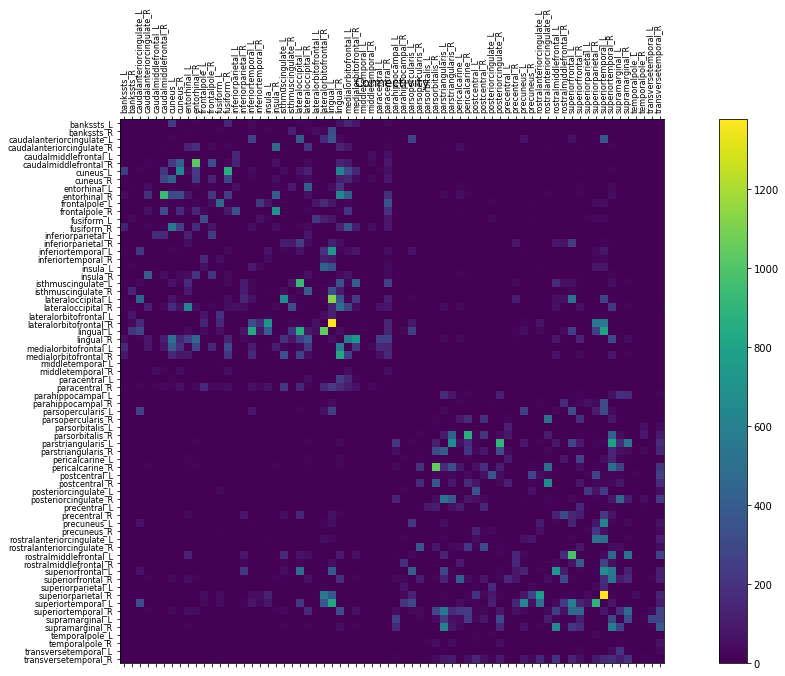

2019-12-02 19:03:19,261 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f49c0072a20>
2019-12-02 19:03:19,263 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-12-02 19:03:19,266 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f49c0072a20>
2019-12-02 19:03:19,268 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-12-02 19:03:19,397 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:19,398 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2019-12-02 19:03:19,734 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:19,836 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:19,837 - DEBUG - matplotlib.axes._base - title position was updated manually, not adjusting
2019-12-02 19:03:20,125 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:20,

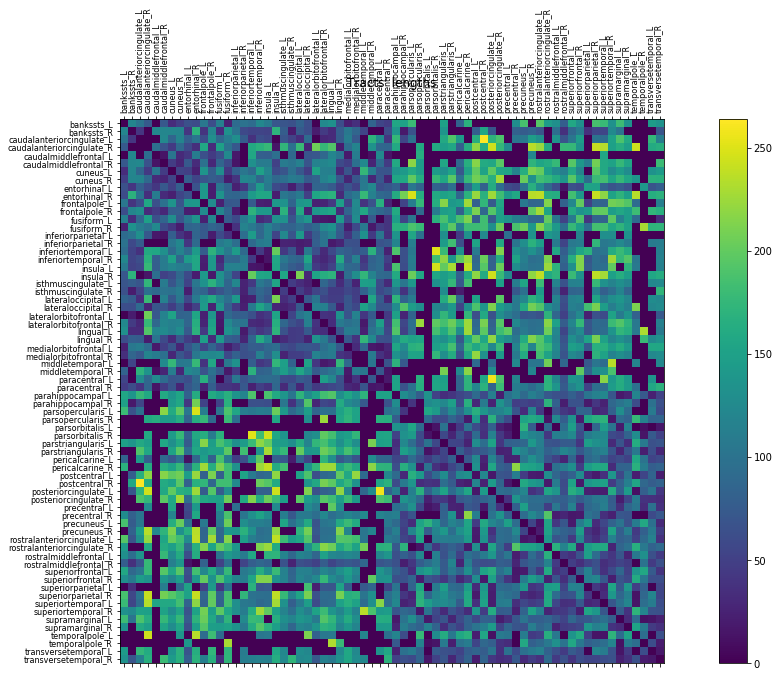

Building NEST network...
2019-12-02 19:03:21,508 - INFO - tvb_nest.simulator_nest.builders.base - Loading a NEST instance...
2019-12-02 19:03:21,508 - INFO - tvb_nest.simulator_nest.builders.base - Loading a NEST instance...
2019-12-02 19:03:21,512 - INFO - tvb_nest.simulator_nest.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2019-12-02 19:03:21,512 - INFO - tvb_nest.simulator_nest.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2019-12-02 19:03:21,516 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2019-12-02 19:03:21,516 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2019-12-02 19:03:21,522 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2019-12-02 19:03:21,522 - INFO - tvb_nest.simulator_nest.builders.base - NEST_DOC_DIR: /home/docker/env/neur

2019-12-02 19:03:21,582 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-02 19:03:21,591 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-02 19:03:21,591 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-02 19:03:21,598 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <= NEST integration step = 0.025 is not possible!
Setting delay equal to NEST integration step!
2019-12-02 19:03:21,598 - WARNING - tvb_nest.simulator_nest.builders.base - Coupling spiking neurons with delay = 0.025000 <

2019-12-02 19:03:24,034 - INFO - tvb_nest.interfaces.nest_to_tvb_interface - <class 'tvb_nest.interfaces.nest_to_tvb_interface.NESTtoTVBinterface'> of model  for  created!
2019-12-02 19:03:24,037 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.interfaces.nest_to_tvb_interface.NESTtoTVBinterface'> of model spike_detector for r_e created!
2019-12-02 19:03:24,037 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.interfaces.nest_to_tvb_interface.NESTtoTVBinterface'> of model spike_detector for r_e created!
2019-12-02 19:03:24,041 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.interfaces.nest_to_tvb_interface.NESTtoTVBinterface'> of model  for  created!
2019-12-02 19:03:24,041 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.interfaces.nest_to_tvb_interface.NESTtoTVBinterface'> of model  for  created!
2019-12-02 19:03:24,043 - INFO - tvb_nest.interfaces.nest_to_tvb_interface - <class 'tvb_nest.interfaces.nest_to_tvb_i

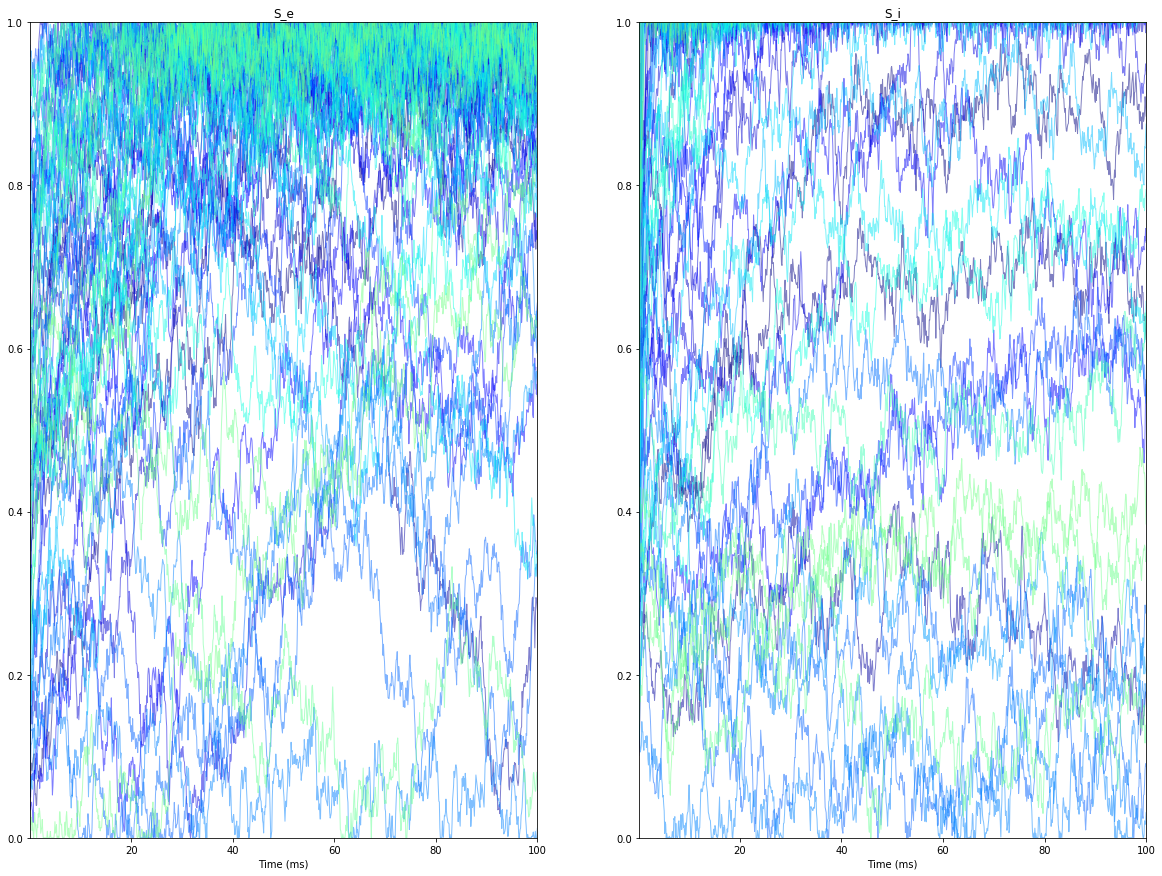

2019-12-02 19:03:55,392 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:55,554 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:55,875 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:56,029 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-02 19:03:56,177 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:56,370 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:56,666 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:56,811 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:57,113 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:57,253 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:57,405 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:57,534 - DEBUG - matplotlib.axes._base - update_title_pos


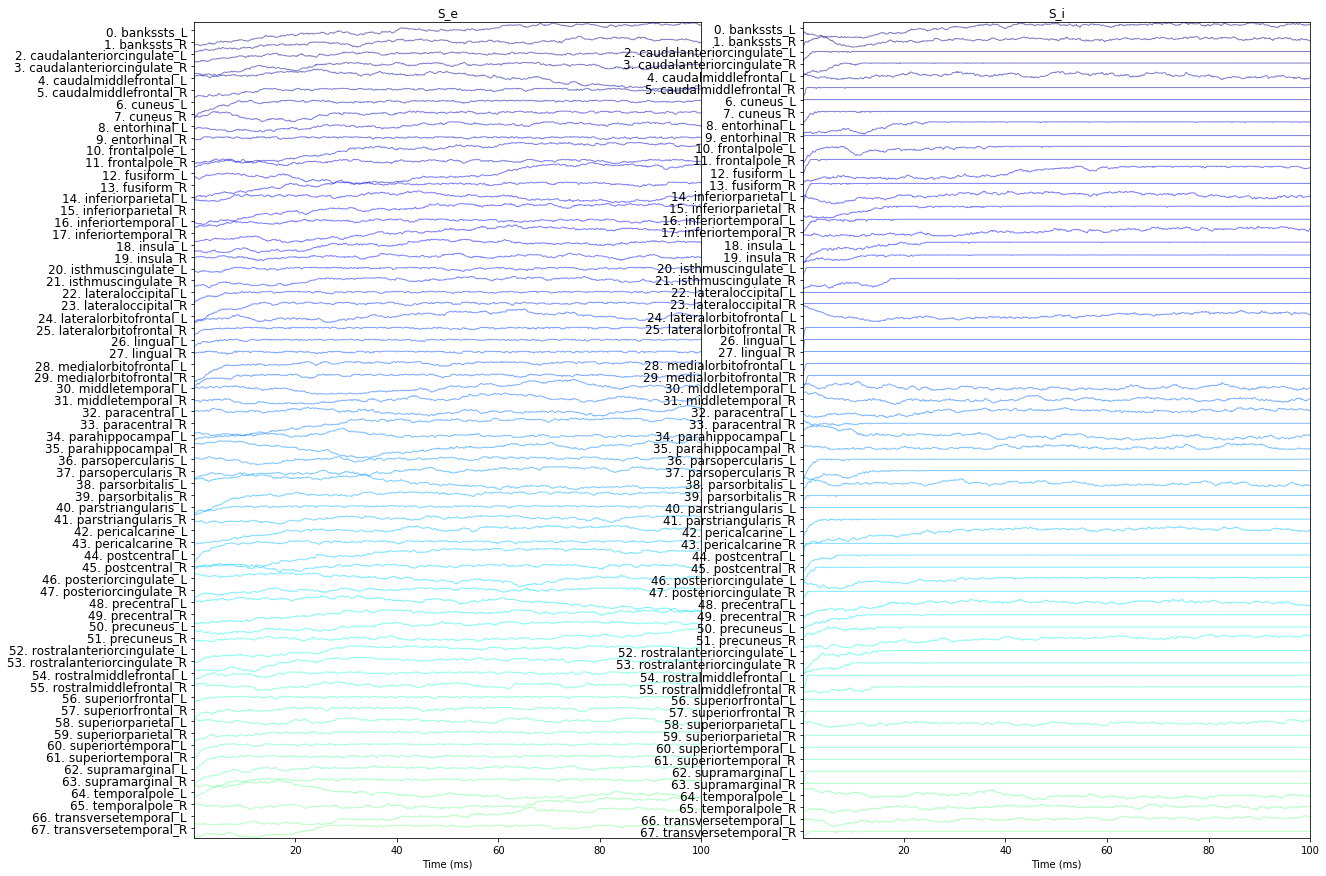

2019-12-02 19:03:58,566 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,591 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,688 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,702 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-02 19:03:58,734 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,751 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,831 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,846 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,876 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,889 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,905 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:58,925 - DEBUG - matplotlib.axes._base - update_title_pos


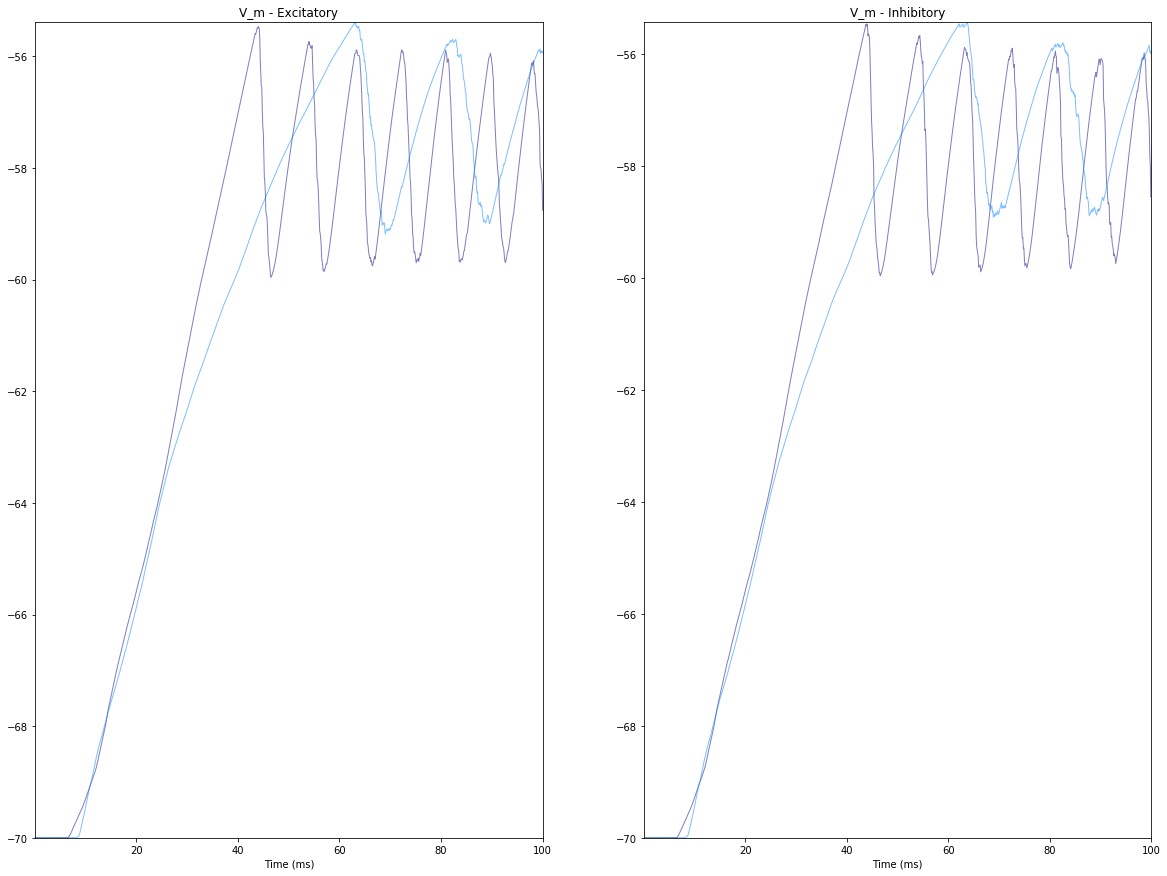

2019-12-02 19:03:59,142 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,162 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,252 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,263 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-02 19:03:59,279 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,291 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,385 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,399 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,426 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,443 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,465 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,482 - DEBUG - matplotlib.axes._base - update_title_pos


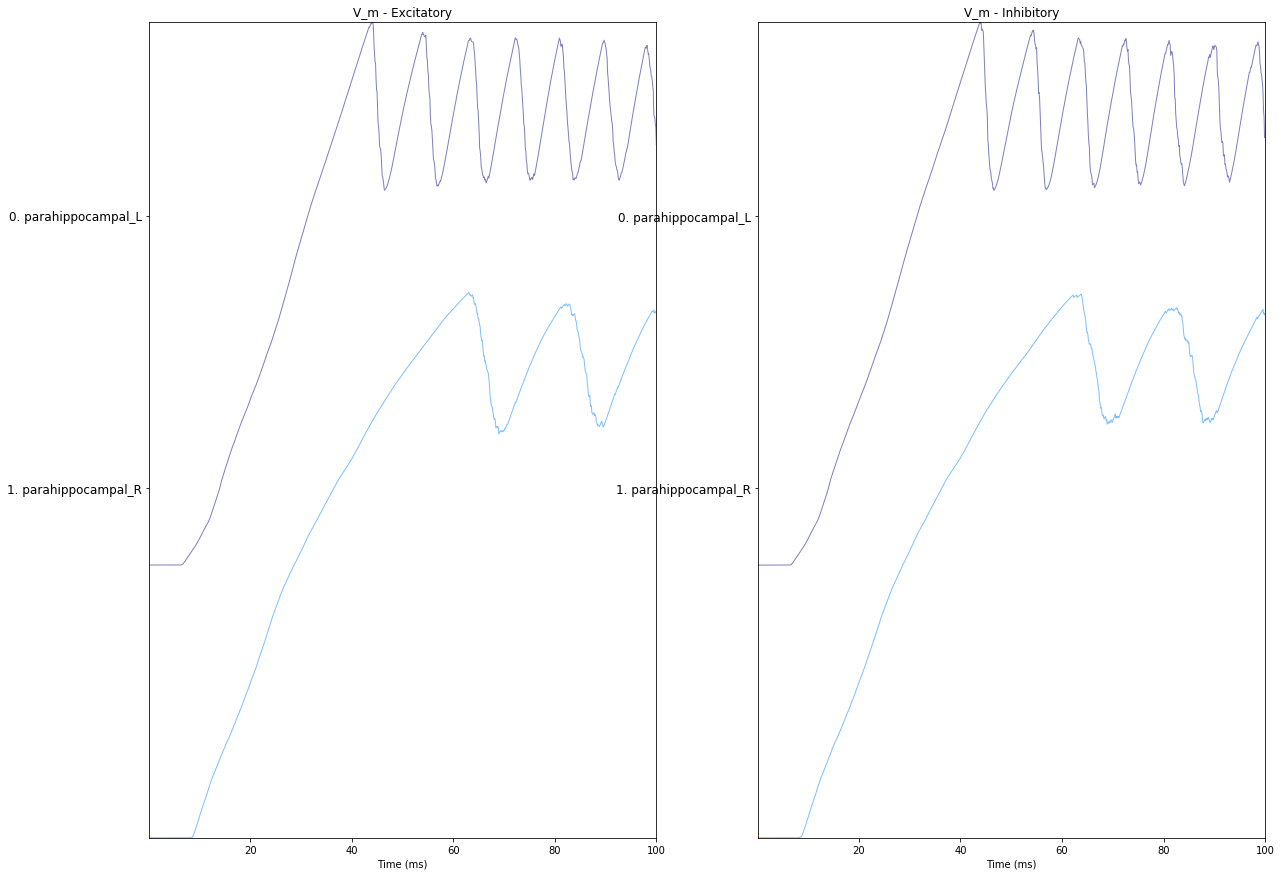

2019-12-02 19:03:59,740 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,767 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,816 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,839 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,935 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,952 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,968 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:03:59,980 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-02 19:04:00,000 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,016 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,033 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,047 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,128 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,144 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,153 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,164 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,194 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,215 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,235 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,248 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,267 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:00,292 -

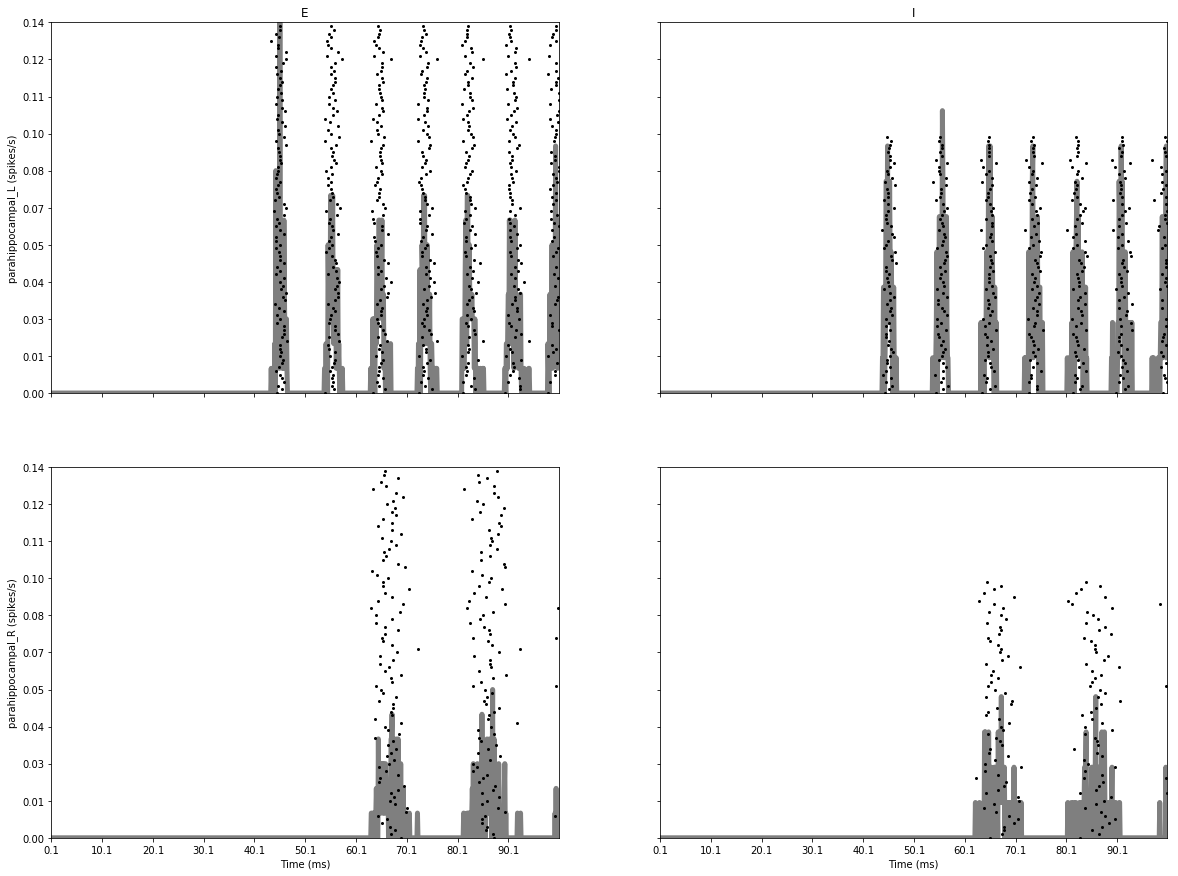

2019-12-02 19:04:01,132 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,160 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,176 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,198 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,219 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,240 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,273 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,291 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,334 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,353 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-12-02 19:04:01,383 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,404 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,435 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,452 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,478 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,497 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,508 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,526 - DEBUG - matplotlib.axes._base - update_title_pos


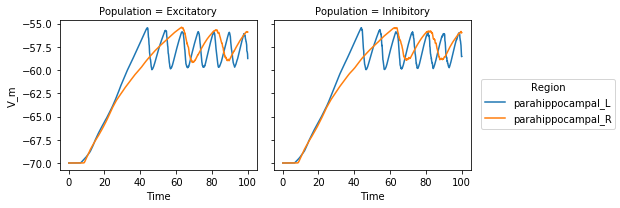

2019-12-02 19:04:01,631 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,688 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,744 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,795 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,827 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:01,843 - DEBUG - matplotlib.axes._base - update_title_pos


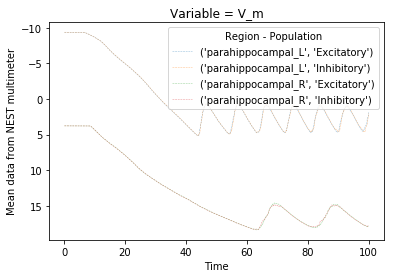

2019-12-02 19:04:02,220 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:02,244 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:02,272 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:02,296 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:02,323 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f49c52ea2e8>
2019-12-02 19:04:02,324 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-12-02 19:04:02,325 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f49c52ea2e8>
2019-12-02 19:04:02,326 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-12-02 19:04:02,342 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:02,443 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:02,545 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:02,649 - DEBUG - matp

(<tvb.datatypes.connectivity.Connectivity at 0x7f49c4f56240>,
 [(array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
            1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
            1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
            2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
            3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
            4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
            5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
            6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
            7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
            8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
            9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,
           10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,  10.8,
           10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11

2019-12-02 19:04:03,222 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,329 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,429 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,532 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,638 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,665 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,685 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,700 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,718 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,736 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,789 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,805 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,817 - DEBUG - matplotlib.axes._base - update_title_pos
2019-12-02 19:04:03,831 -

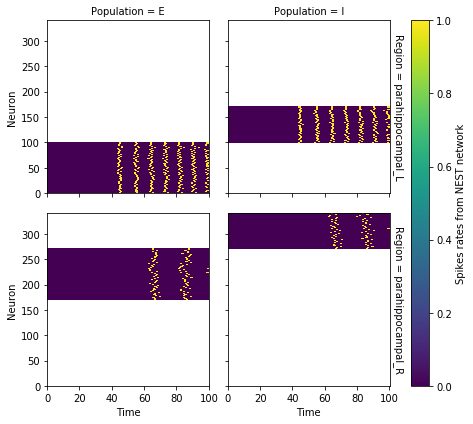

In [13]:
# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

from tvb_nest.examples.example import main_example
from tvb_nest.config import CONFIGURED
from tvb_nest.simulator_tvb.simulator import Simulator
from tvb_nest.simulator_tvb.models.reduced_wong_wang_exc_io_inh_i import ReducedWongWangExcIOInhI
from tvb_nest.simulator_tvb.models.wilson_cowan_constraint import WilsonCowan
from tvb_nest.simulator_tvb.models.generic_2d_oscillator import Generic2dOscillator
from tvb_nest.simulator_nest.builders.models.default_exc_io_inh_i import DefaultExcIOInhIBuilder
from tvb_nest.simulator_nest.builders.models.red_ww_exc_io_inh_i import RedWWExcIOInhIBuilder
from tvb_nest.simulator_nest.builders.models.ww_deco2014 import WWDeco2014Builder
from tvb_nest.interfaces.builders.models.red_ww_exc_io_inh_i \
    import RedWWexcIOinhIBuilder as InterfaceRedWWexcIOinhIBuilder
from tvb_nest.interfaces.builders.models.ww_deco2014 \
    import WWDeco2014Builder as InterfaceWWDeco2014Builder
from tvb_nest.interfaces.builders.models.wilson_cowan import \
    WilsonCowanBuilder as InterfaceWilsonCowanBuilder
from tvb_nest.interfaces.builders.models.generic_2d_oscillator import \
    Generic2DOscillatorBuilder as InterfaceGeneric2DOscillatorBuilder
from tvb_nest.plot.plotter import Plotter
from tvb.datatypes.connectivity import Connectivity
from tvb.simulator.monitors import Raw  # , Bold  # , EEG

# # -----------------------------Generic2dOscillator oscillatory regime-----------------------------------------------
# model = Generic2dOscillator()
# model.d = np.array([0.1])
# model.e = np.array([0.0])
# model.f = np.array([1.0])
# model.g = np.array([1.0])
# model.I = np.array([0.0])
# model.tau = np.array([1.0])
# model.alpha = np.array([1.0])
# model.beta = np.array([0.0])
# model.a = np.array([0.0])
# model.b = np.array([-1.0])
# model.c = np.array([0.0])
# model.variables_of_interest = ["V", "W"]
# # -----------------------------------Wilson Cowan oscillatory regime------------------------------------------------
# model = WilsonCowan()
# model.tau_e = np.array([8.0])
# model.tau_i = np.array([8.0])
# model.c_ee = np.array([16.0])
# model.c_ei = np.array([12.0])
# model.c_ie = np.array([15.0])
# model.c_ii = np.array([3.0])
# model.a_e = np.array([1.3])
# model.a_i = np.array([2.0])
# model.b_e = np.array([4.0])
# model.b_i = np.array([3.7])
# model.P = np.array([0.0])
# model.variables_of_interest = ["V", "W"]
main_example(ReducedWongWangExcIOInhI(), RedWWExcIOInhIBuilder, InterfaceRedWWexcIOinhIBuilder,
             nest_nodes_ids, nest_populations_order=100, connectivity=connectivity, 
             simulation_length=100.0, tvb_state_variable_type_label="State Variables",
             exclusive_nodes=True, noise_strength=0.001, config=CONFIGURED)

In [7]:
nest.Models()

NameError: name 'nest' is not defined

In [ ]:
from pynestml.frontend.pynestml_frontend import to_nest, install_nest
import os
models_path = os.path.join(config.nest.MODULES_DIR, "iaf_cond_deco2014")

In [ ]:
install_nest(models_path, os.environ["NEST_INSTALL_DIR"])

In [ ]:
import nest
nest.Models()

In [ ]:
nest.Install("iaf_cond_deco2014module")

In [ ]:
nest.Models()

In [ ]:
n = nest.Create("iaf_cond_deco2014")

In [ ]:
nest.GetStatus(n)

In [ ]:
import numpy as np
n1 = nest.Create("iaf_cond_deco2014", params={"w_E_ext": np.array([0.1, 0.1])})
n2 = nest.Create("iaf_cond_deco2014", params={"w_E_ext": np.array([0.1, 0.1])})

In [ ]:
nest.Connect(n1, n1, syn_spec={"receptor_type": 0})
nest.Connect(n2, n2, syn_spec={"receptor_type": 0})
nest.Connect(n1, n2, syn_spec={"receptor_type": 1})
nest.Connect(n2, n1, syn_spec={"receptor_type": 2})

In [ ]:
m = nest.Create("multimeter", params={"record_from": ["s_AMPA_ext"]})
nest.Connect(m, n1 + n2)

In [ ]:
nest.Simulate(10)

In [ ]:
nest.GetStatus(m, "events")

In [ ]:
nest.GetConnections(m)

In [ ]:
n